In [169]:
# Import library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

In [170]:
# Import dataset
data = pd.read_csv('5000 - Health Insurance Cross Sell.csv')

print(data.shape)

data.head()

(5000, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    5000 non-null   int64 
 1   Gender                5000 non-null   object
 2   Age                   5000 non-null   int64 
 3   Driving_License       5000 non-null   int64 
 4   Region_Code           5000 non-null   int64 
 5   Previously_Insured    5000 non-null   int64 
 6   Vehicle_Age           5000 non-null   object
 7   Vehicle_Damage        5000 non-null   object
 8   Annual_Premium        5000 non-null   int64 
 9   Policy_Sales_Channel  5000 non-null   int64 
 10  Vintage               5000 non-null   int64 
 11  Response              5000 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 468.9+ KB


**Exploratory Data Analysis**

In [172]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.68200,0.997800,26.201000,0.441600,30929.683400,112.909600,156.145600,0.123800
std,1443.520003,15.47505,0.046857,13.173918,0.496627,16732.411341,53.607076,83.681385,0.329386
min,1.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,1250.750000,24.00000,1.000000,15.000000,0.000000,24814.000000,40.750000,85.000000,0.000000
50%,2500.500000,36.00000,1.000000,28.000000,0.000000,31967.000000,136.000000,156.000000,0.000000
75%,3750.250000,49.00000,1.000000,35.000000,1.000000,39816.000000,152.000000,229.000000,0.000000
max,5000.000000,84.00000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


In [173]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [174]:
data['Gender'].value_counts()

Male      2702
Female    2298
Name: Gender, dtype: int64

In [175]:
df=data.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

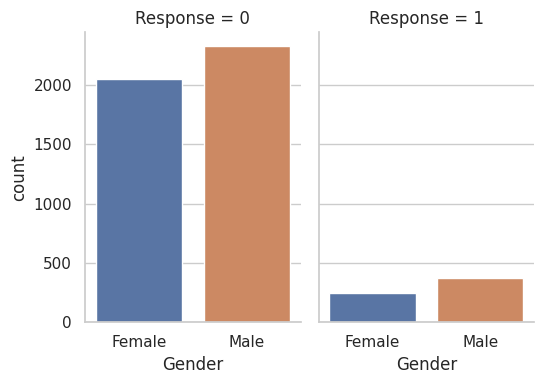

In [176]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [177]:
df=data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,2298
1,Male,2702


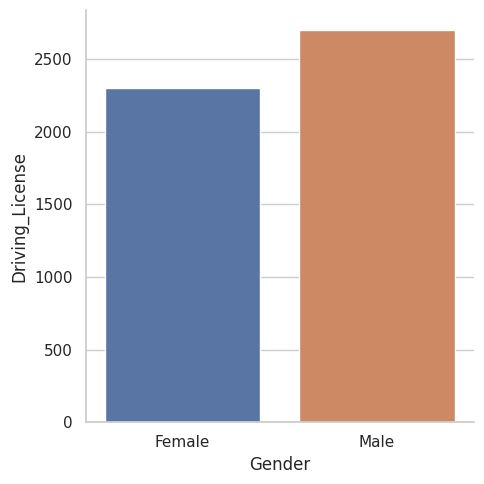

In [178]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

In [179]:
data['Age'].value_counts()

24    353
23    320
22    281
25    273
21    214
     ... 
78     13
80      7
84      1
83      1
81      1
Name: Age, Length: 64, dtype: int64

<ipython-input-180-731b6eb60ab0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age)


<Axes: xlabel='Age', ylabel='Density'>

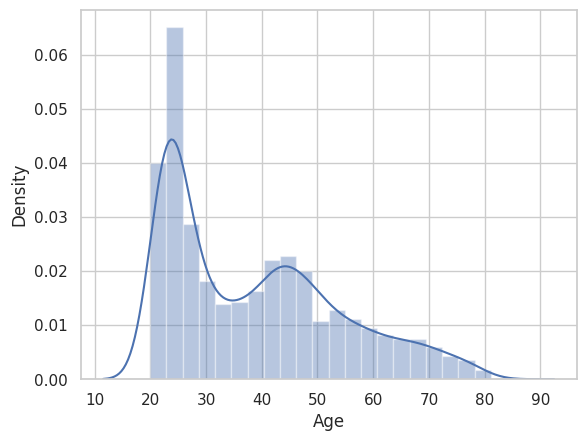

In [180]:
sns.distplot(data.Age)

<Axes: xlabel='Age', ylabel='Annual_Premium'>

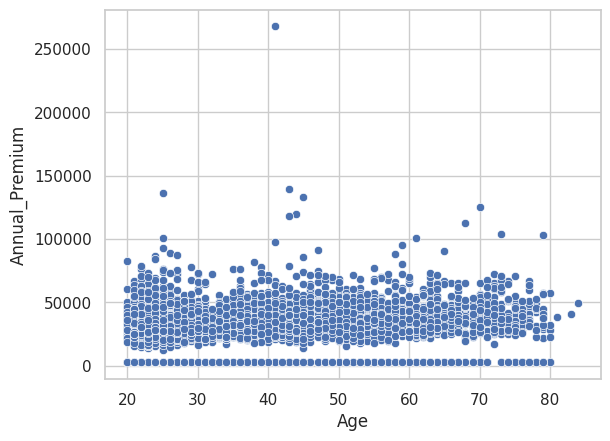

In [181]:
sns.scatterplot(x=data['Age'],y=data['Annual_Premium'])

In [182]:
data['Driving_License'].value_counts()

1    4989
0      11
Name: Driving_License, dtype: int64

In [183]:
data['Previously_Insured'].value_counts()

0    2792
1    2208
Name: Previously_Insured, dtype: int64

In [184]:
data['Vehicle_Age'].value_counts()

1-2 Year     2598
< 1 Year     2169
> 2 Years     233
Name: Vehicle_Age, dtype: int64

In [185]:
df=data.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,2139
1,1-2 Year,1,459
2,< 1 Year,0,2080
3,< 1 Year,1,89
4,> 2 Years,0,162
5,> 2 Years,1,71


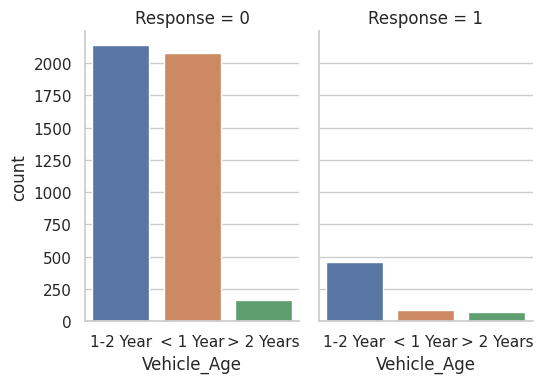

In [186]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [187]:
data['Vehicle_Damage'].value_counts()

Yes    2585
No     2415
Name: Vehicle_Damage, dtype: int64

In [188]:
df=data.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,No,0,2405
1,No,1,10
2,Yes,0,1976
3,Yes,1,609


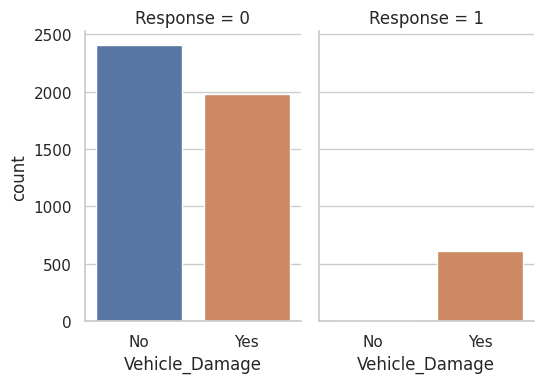

In [189]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [190]:
data['Vintage'].value_counts()

88     29
149    28
221    27
258    27
270    27
       ..
290     8
52      8
272     6
54      6
282     6
Name: Vintage, Length: 290, dtype: int64

In [191]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

<ipython-input-192-4d54476ef168>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', center = 0)


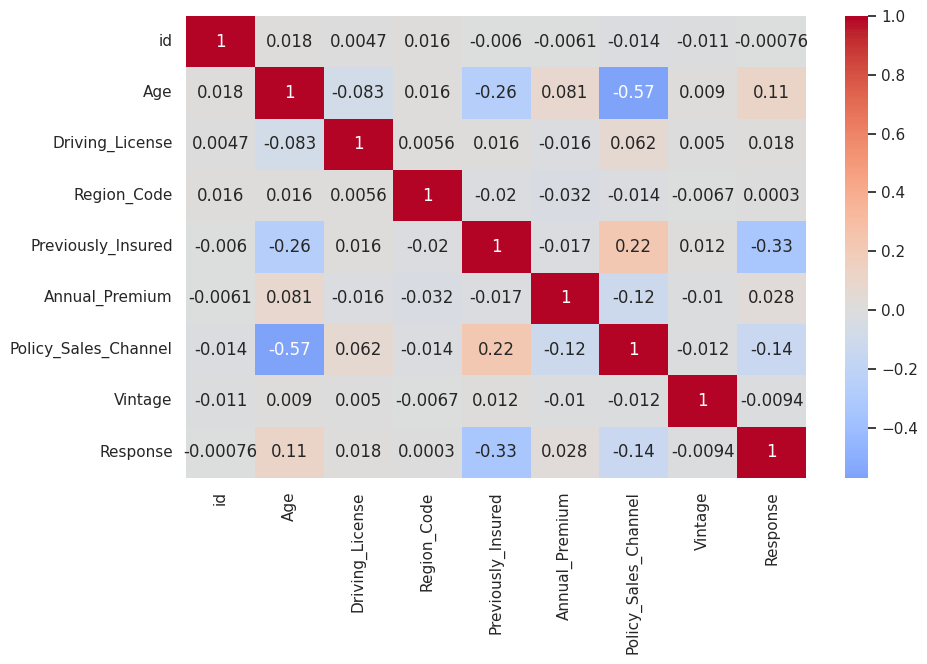

In [192]:
# plotting the correlation plot for the dataset

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', center = 0)
plt.show()

**Data Preprocessing**

In [193]:
# removing unnecassary columns from the dataset

#data = data.drop('Pol', axis = 1)

print(data.shape)

data.columns


(5000, 12)


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [194]:
# label encoding for gender

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for males and 1 for females
data['Gender'] = le.fit_transform(data['Gender'])

# label encoding for Vehicle_Damage
# 0 for no and 1 for yes
data['Vehicle_Damage'] = le.fit_transform(data['Vehicle_Damage'])

In [195]:
data['Gender'].value_counts()

1    2702
0    2298
Name: Gender, dtype: int64

In [196]:
data['Vehicle_Damage'].value_counts()

1    2585
0    2415
Name: Vehicle_Damage, dtype: int64

In [197]:
#data['Age']=data['Age'].map({20:'young age', 21:'young age', 22:'young age', 23:'young age', 24:'young age', 25:'young age',
                          #  26:'young age', 27:'young age', 28:'young age', 29:'young age', 30:'young age', 31:'young age',
                          #  32:'young age', 33:'young age', 34:'young age', 35:'young age', 36:'young age', 37:'young age',
                          #  38:'young age', 39:'young age', 40:'young age', 41:'young age', 42:'young age', 43:'young age',
                          #  44:'young age', 45:'middle age', 46:'middle age', 47:'middle age', 48:'middle age', 49:'middle age',
                          #  50:'middle age', 51:'middle age', 52:'middle age', 53:'middle age', 54:'middle age', 55:'middle age',
                          #  56:'middle age', 57:'middle age', 58:'middle age', 59:'middle age', 60:'middle age', 61:'elderly',
                          #  62:'elderly', 63:'elderly', 64:'elderly', 65:'elderly', 66:'elderly', 67:'elderly', 68:'elderly',
                          #  69:'elderly', 70:'elderly', 71:'elderly', 72:'elderly', 73:'elderly', 74:'elderly', 75:'elderly',
                          #  76:'elderly', 77:'elderly', 78:'elderly', 79:'elderly', 80:'elderly', 81:'elderly', 82:'elderly',
                          #  83:'elderly', 84:'elderly', 85:'elderly'})
#data['Age']=data['Age'].map({'young age':0,'middle age':1,'elderly':2})

In [198]:
#data['Age'].min()
#data['Age'].value_counts()

In [199]:
data['Vehicle_Age']=data['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [200]:
data['Vehicle_Age'].min()
data['Vehicle_Age'].value_counts()

1    2598
0    2169
2     233
Name: Vehicle_Age, dtype: int64

In [201]:
# splitting the dependent and independent variable

x = data.iloc[:,1:11]
y = data.iloc[:,11]

print(x.shape)
print(y.shape)

(5000, 10)
(5000,)


In [202]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 10)
(1000, 10)
(4000,)
(1000,)


In [203]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

***Random Forest Classifier***

In [204]:
from sklearn.ensemble import RandomForestClassifier

# We define the RF model
rf = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=9)

In [205]:
#Make predictions using the features from the test data set
predictions = rf.predict(x_test)

#Display our predictions
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [206]:
#Create a  DataFrame
newdata = data.iloc[:1000,:10]
submission = pd.DataFrame({'id':newdata['id'],'Response':predictions})

#Visualize the first 5 rows
submission.head()

,id,Response
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [207]:
#Convert DataFrame to a csv file that can be uploaded

filename = 'submission-predictions.csv'

submission.to_csv(filename,index=False)

print(filename + ' saved successfully.')

submission-predictions.csv saved successfully.
